In [22]:
import pandas as pd
import os

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = r"C:\Users\satvi\Downloads\archive\US_Accidents_March23.csv"
df = pd.read_csv(data_path, low_memory=False)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)

✅ Dataset loaded successfully!
Shape: (1348143, 46)


In [31]:
df = df.dropna(subset=['Weather_Condition', 'Start_Time', 'Start_Lat', 'Start_Lng']).copy()

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

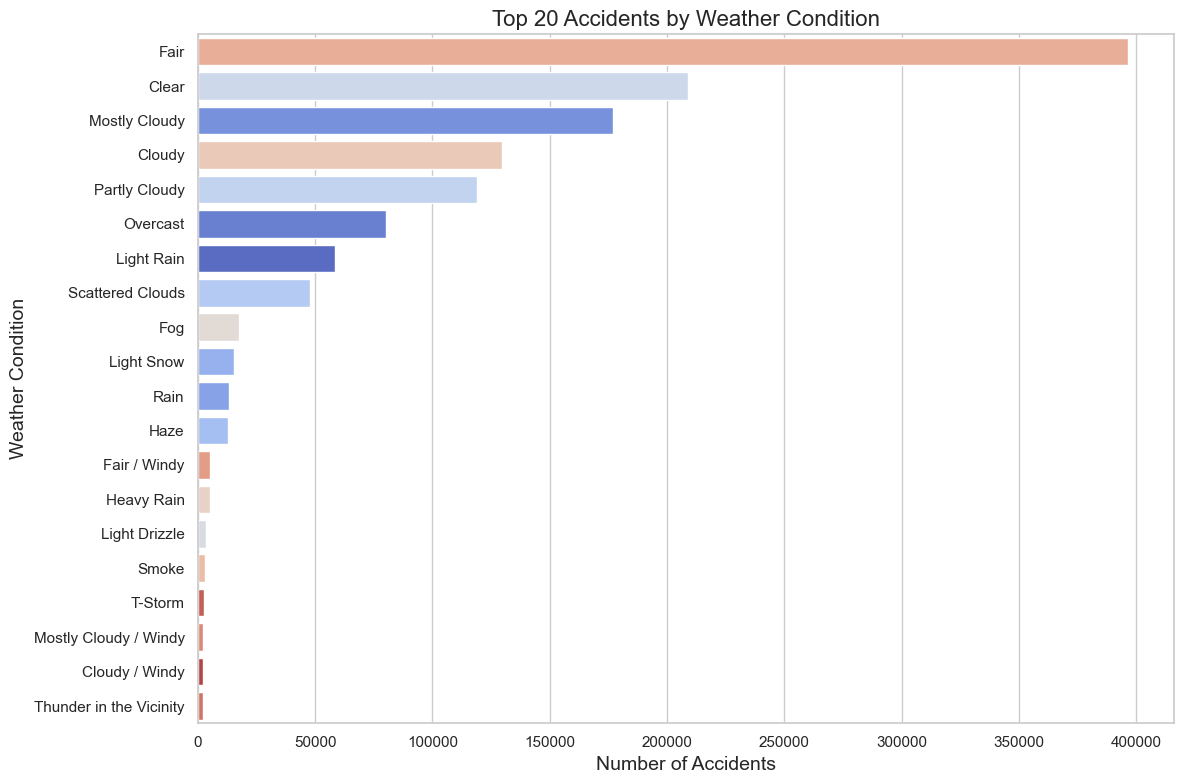

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

top_conditions = df['Weather_Condition'].value_counts().nlargest(20).index

plt.figure(figsize=(12, 8))
sns.countplot(
    y='Weather_Condition',
    data=df[df['Weather_Condition'].isin(top_conditions)],
    order=top_conditions,
    hue='Weather_Condition',  
    palette='coolwarm',
    legend=False            
)

plt.title("Top 20 Accidents by Weather Condition", fontsize=16)
plt.xlabel("Number of Accidents", fontsize=14)
plt.ylabel("Weather Condition", fontsize=14)

plt.tight_layout()
plt.show()

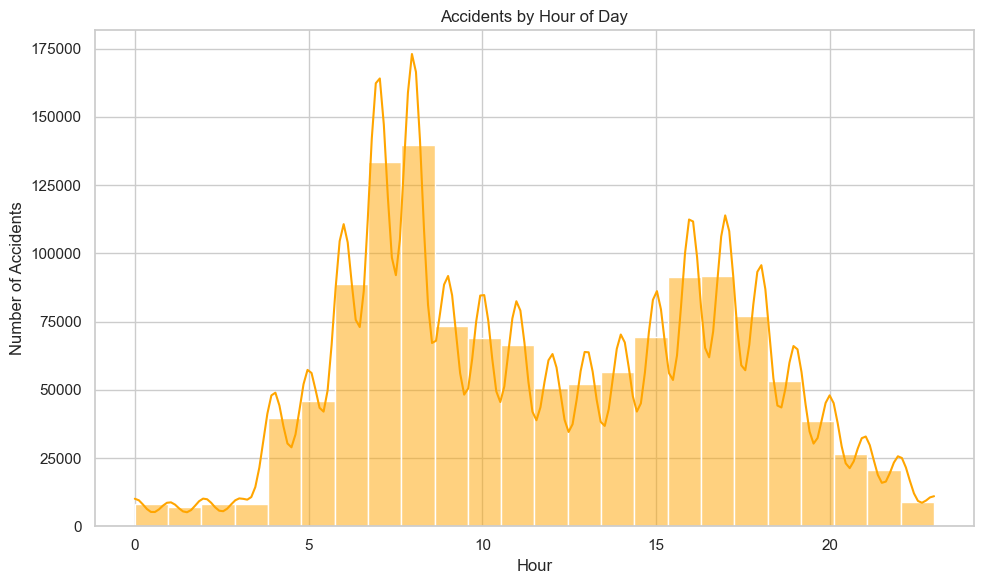

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'], bins=24, kde=True, color='orange')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

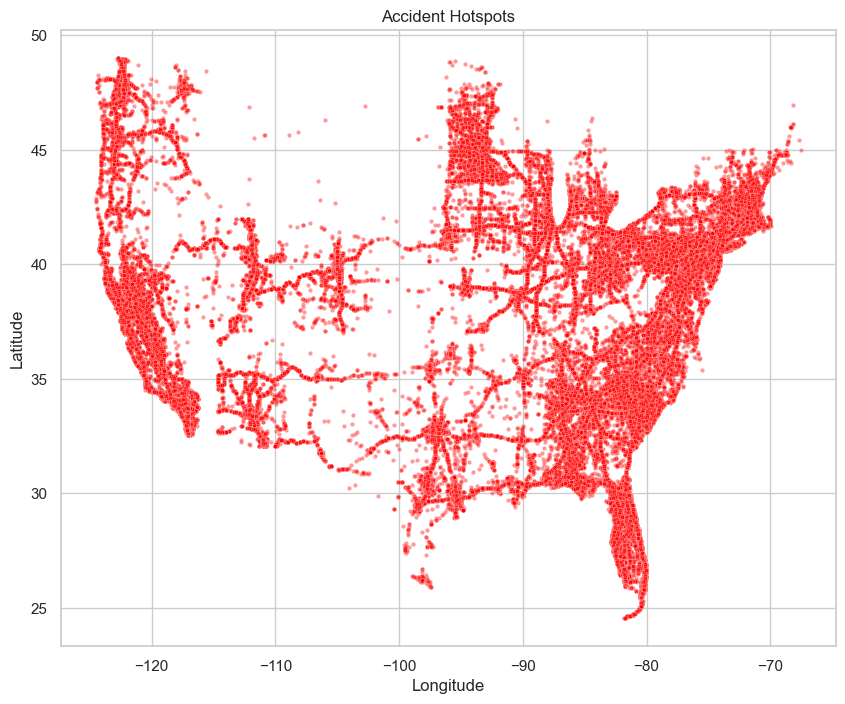

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


df_locations = df.dropna(subset=['Start_Lat', 'Start_Lng'])

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Start_Lng', 
    y='Start_Lat', 
    data=df_locations, 
    s=10,          
    alpha=0.4,     
    color='red'
)
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

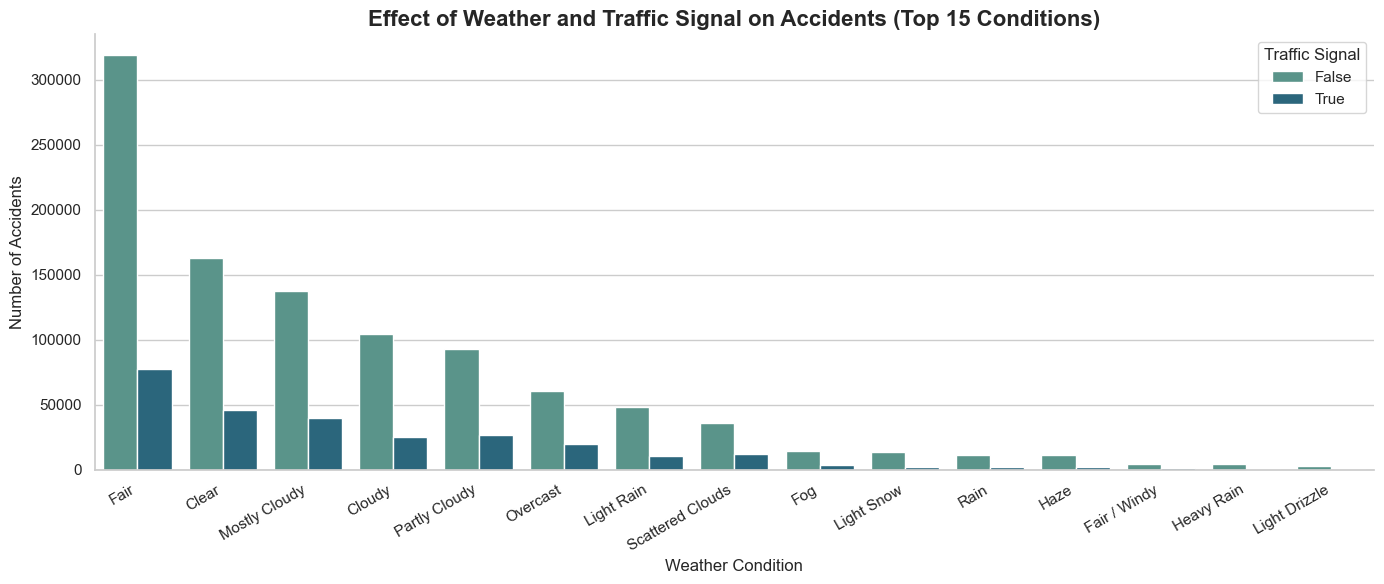

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_col = 'weather_condition'
traffic_col = 'traffic_signal'

df_grouped = (
    df.groupby([weather_col, traffic_col])
    .size()  # counts rows (accidents)
    .reset_index(name='accident_count')
)

top_conditions = (
    df_grouped.groupby(weather_col)['accident_count']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

df_top = df_grouped[df_grouped[weather_col].isin(top_conditions)].copy()

df_top[weather_col] = pd.Categorical(
    df_top[weather_col],
    categories=top_conditions,
    ordered=True
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_top,
    x=weather_col,
    y='accident_count',
    hue=traffic_col,
    palette='crest'
)

plt.title('Effect of Weather and Traffic Signal on Accidents (Top 15 Conditions)',
          fontsize=16, weight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Traffic Signal', loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()

